In [3]:
#Importing important librabries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<h4>Reading data:</h4><br>
We import <i>pandas</i> library to read the CSV file into dataframe <i>data</i>.

In [4]:

data = pd.read_csv('A_ZHandwrittenData.csv', header=None)

<h4>Analysis of data</h4> <br>
We do some elementary analysis for column names, datatype of <i>data</i>, check if there are any rows with null values etc.


In [5]:
#checking number of rows (images) in data
data.rename(columns = {0:'OUTPUT'}, inplace = True)
print("Total no. of rows = ",len(data))
print("Total no. of columns = ",data.shape[1])

Total no. of rows =  372451
Total no. of columns =  785


In [6]:
data

,OUTPUT,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Data = data

#### Now we will Bin Down the Image so that Complexity of this problem Drops Down... as each pixel can have value from 0 to 255, the whole Calcultation takes time with Multitude of 256. If we Bin down the Pixels to 0 and 1 only then whole will have multitude of 2 instead, therefore Speeding up the proble 128 Times, Which is an infinetly Significant Improvement given the Size of our dataset

Data is read successfully in proper format, no type conversion is needed, and there are no missing values. Column names are numbers, we will use column name and/or indices to access any perticular feature (column). Let us first split the data into training set and test set.

In [8]:
#Importing important librabries
import numpy as np
import random

split_coeff = 0.9   # Train data split (taken to be 90%) 

len_train = int(split_coeff*len(data)) # give the number of rows(images) in train data

train_index = random.sample(range(1, len(data)), len_train) # splitting the data randomly.

data_train = data.iloc[train_index]   # We pickup the testing Data to be the one having these Indices
data_test = data.drop(data.index[train_index]) # The rest 10% data will be used as test data


print("training data shape: ", data_train.shape)
print("testing data shape: ", data_test.shape)


training data shape:  (335205, 785)
testing data shape:  (37246, 785)


In [9]:
# Now we will calculate for the Count of various Classes, Which we already know is 26, in our case

class_labels = data_train.iloc[:,0] # Extracting Class Names(0-25) out of the data
num_of_classes = len(class_labels.unique()) #  gives total number of classes



#### Calculating frequency of classes in the training dataset  

In [10]:

freq = np.zeros((num_of_classes,), dtype=int) # for keeping count of rows that belongs to same class ci
prior_ci = np.zeros(num_of_classes) # for calculating probability p(ci) which is p0, p1, p2 etc. as per the class

#frequencies count 
for label in class_labels:
    for i in range(num_of_classes):
        if label==i:
            freq[i] += 1
            break    


print(freq)

[12471  7796 21008  9073 10267  1070  5216  6508  1000  7657  5065 10414
 11110 17154 51982 17381  5222 10423 43728 20206 26119  3799  9666  5683
  9774  5413]


#### We can get a pictorial idea of how classes are ditributed over the dataset

<BarContainer object of 26 artists>

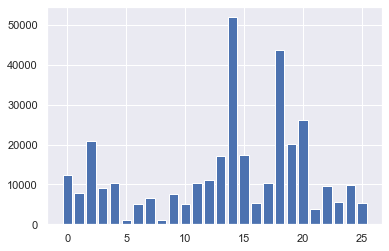

In [11]:
x=[] # defining empty list which consists of integers 0-25
for i in range(num_of_classes):
    x.append(i)

sns.set(font_scale=1)
plt.bar(x,freq) # this plot shows the number of occurence of each classes ci(0-25) in our training dataset
# plt.line(x,freq)

#### Calculating priors- 

In [12]:

for i in range(num_of_classes):
    prior_ci[i] = float( freq[i] / len_train ) #calculating priors 
    
print("Priors P(ci) = ")
print(prior_ci)


Priors P(ci) = 
[0.0372041  0.02325741 0.0626721  0.02706702 0.03062902 0.00319208
 0.01556063 0.01941498 0.00298325 0.02284274 0.01511016 0.03106756
 0.0331439  0.05117465 0.15507525 0.05185185 0.01557853 0.0310944
 0.13045151 0.06027953 0.07791948 0.01133336 0.02883609 0.0169538
 0.02915828 0.01614833]


In [13]:
data_train

,OUTPUT,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
134397,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130435,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203020,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76420,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118849,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332703,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29198,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207291,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127625,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
# NOTE THIS IS A VERY LONG STEP AND MIGHT TAKE UP A LOT OF YOUR RAM AND WILL ALSO THROW MILLIONS OF CHARACTERS ON OUTPUT CONSOLE BEFORE SOLVING 
# BECAUSE OF PANDAS "BETWEEN" THERFORE TO ACCELERATE YOU CAN SIMPLY SKIP THIS CELL AND MOVE TO THE 2ND CELL FROM HERE WHERE IN ALL THE CLASS CONDITIONALS
# ARE SAVED (SAVING STEP IN NEXT CELL)
# REST YOU CAN RUN THIS IF YOU WISH

data_train = data_train.set_index(['OUTPUT'])
f_i = np.zeros((784,2,num_of_classes))  # 3D Matrix to store for all the ClassConditionals required

for i in range(0,784):
    for j in range(0,2):
        for singleClass in range(0,26):
            data_class_i = data_train.xs(singleClass) # with this we are fixing a particular Letter/ Class
            numerator = sum(data_class_i.iloc[:,i].between(128*j, 128*(j+1)-1 , inclusive=True))
            denominator = len(data_class_i)
            temp = (numerator + 1) / ( denominator + 2) # Here Laplace Smoothening has been done
            f_i[i,j,singleClass] = temp
    print(i)    


In [15]:

f_i_newShape = f_i.reshape(f_i.shape[0], -1)
np.savetxt('classConditionals.txt',f_i_newShape)
# We have just turned this 3D matrix into 2D Matrix so that we can save it well in txt file

In [16]:
# let us retrive our saved model from text file
local = np.loadtxt('classConditionals.txt')
f_i = local.reshape(local.shape[0],local.shape[1]//num_of_classes, num_of_classes)
print(f_i.shape)

(784, 2, 26)


In [17]:
log_prior_ci = np.log(prior_ci) #taking log of priors for easy calculation
log_f_i = np.log(f_i) #taking log of fi's for calculation ease

In [18]:
def getMax(arr): #for argmax of qi's
    return int(np.argmax(arr))

#### Making classifier for model and try predicting it 

In [19]:
#defining Classifier and prediction of model

def classifier(testing_data,num_of_classes,log_priors,log_classConditionals):

    predicted_class = np.zeros((len(testing_data)),dtype= int)
    count = np.zeros((num_of_classes))
    currRow = 0
    while currRow < len(testing_data):

        for i in range(num_of_classes):
            count[i] = log_priors[i]  # [ _ _ _ _ _   .... 26 Entities] stored as log(priors)
        
        for j in range(1,785):
            currPixel = testing_data.iloc[currRow,j]
            # 0 -> 0  , 127 -> 128*k , 128(k+1) - 1 
            # 1 -> 128, 256 -> 128(k) , 128(k+1) - 1
            for k in range(2):
                if currPixel in range(128*k , 128*(k+1) - 1):
                    for l in range(num_of_classes):
                        count[l] += log_classConditionals[j-1,k,l] #summation of log(fi's) for 'i' 0 to 25
                    break

        predicted_class[currRow] = getMax(count)
        currRow += 1
        if((currRow%len((testing_data)/100))==0):     # Progress Bar is for 372 because there are 37246 Rows in Testing Data, So 
                                                      # Therefore Each # represent a %age of progress, 100#  represent status : complete
            print("#", end="")  # Because Everyone Loves a progress Bar

    return predicted_class


In [20]:
# # len_test = len(data_test)
predicted_class = np.zeros((len(data_test)),dtype= int)
predicted_class = classifier(data_test,num_of_classes,log_prior_ci,log_f_i)

# # Testing Data
# #  A 0 0 0 0 1 32 43 45 ...784 peices   A
# #  F 0 0 0 0 1 32 43 45 ...             E
# #  G 0 0 0 0 1 32 43 45                     
# #  G 0 0 0 0 1 32 43 45
# #  H 0 0 0 0 1 32 43 45
# #  M 0 0 0 0 1 32 43 45


#############################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predicted_class,data_test['OUTPUT'])
print("Accuracy is: ", (accuracy)*100,'%')


Accuracy is:  70.24953015088869 %


#### So Accuracy is about 70%  -(varies sometime)

In [28]:
data_test['OUTPUT'].array

<PandasArray>
[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
 ...
 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
Length: 37246, dtype: int64

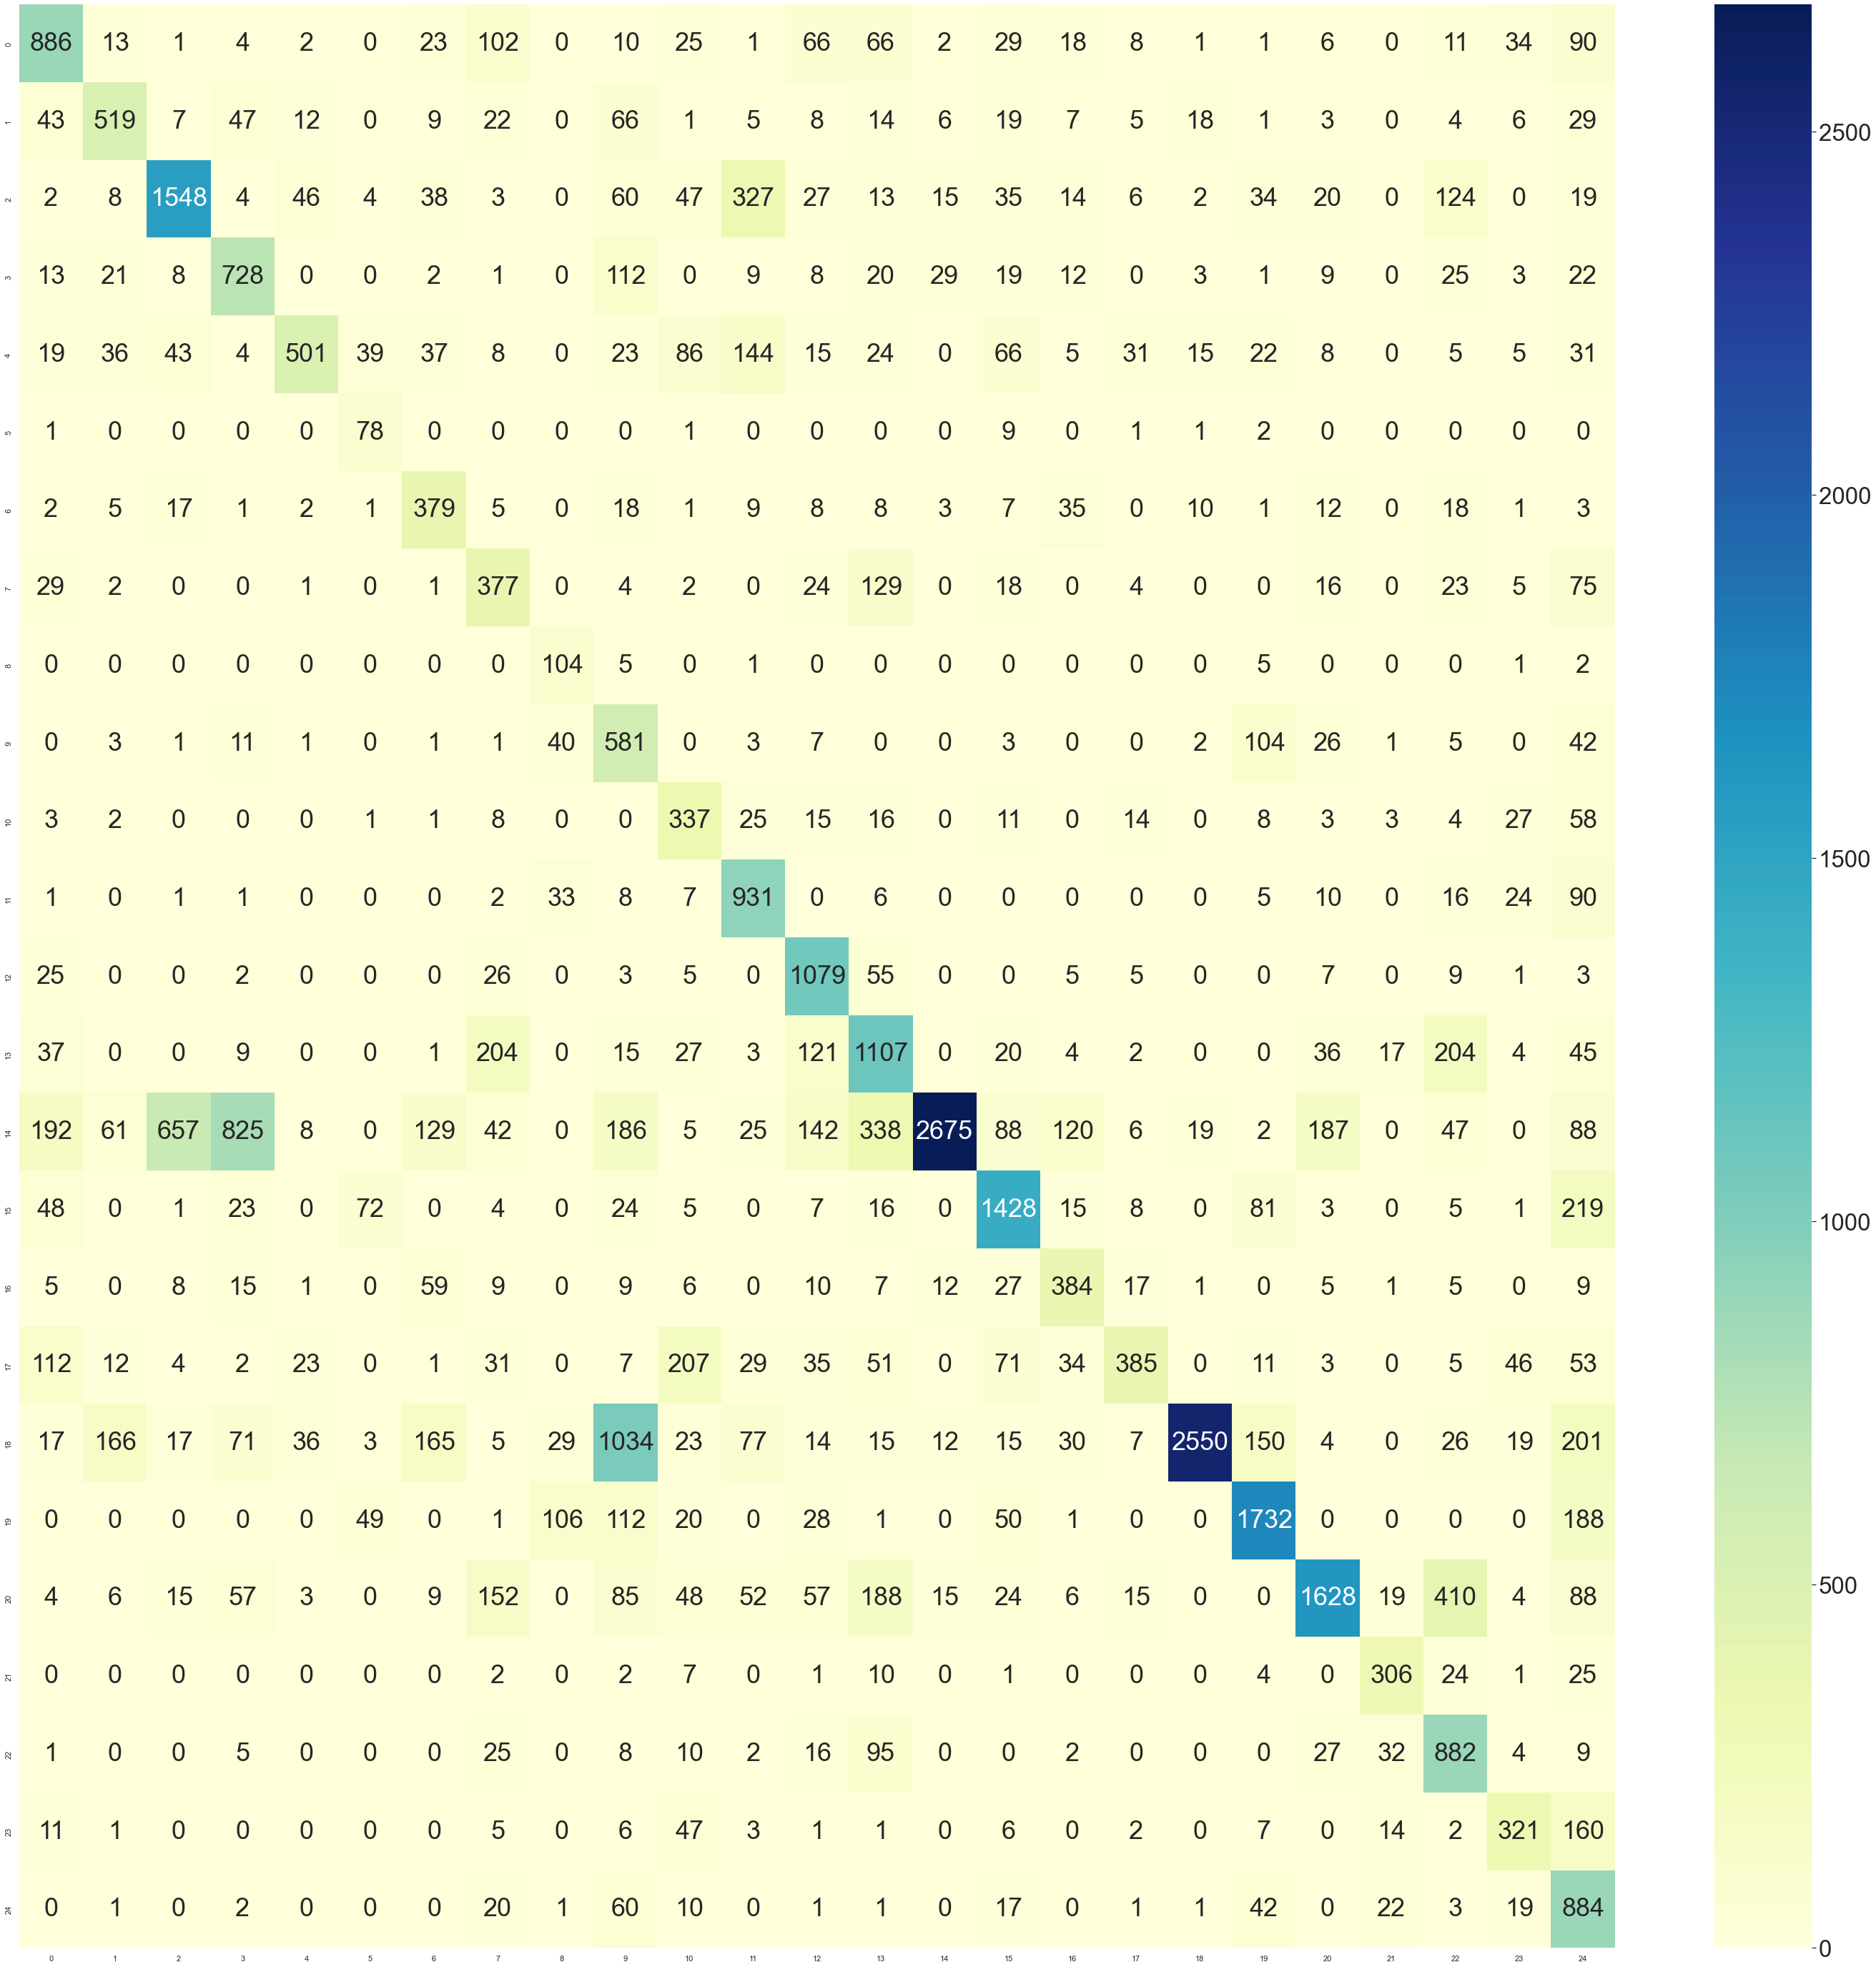

In [32]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(data_test['OUTPUT'].array, predicted_class,labels = np.arange(0,25))

fig, ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=3)
heat_map = sns.heatmap(data = confusion_mtx,cmap="YlGnBu",annot = True,fmt = "d",ax = ax)
